# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [38]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [39]:
train, test = keras.datasets.cifar10.load_data()

In [40]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [41]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [43]:
LEARNING_RATE = [1e-3, 1e-2]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
    
results = {}
for lr in LEARNING_RATE:
    for name in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with optimizer: {name}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()

        if name == 'SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        elif name == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif name == 'AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        else:
            optimizer = keras.optimizers.Adam(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test))

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"exp-optimizer-{name}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with optimizer: SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 444,170
Trainable params: 444,170
Non-trainable params: 0
_______________________________________

Epoch 13/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4617 - acc: 0.4757 - val_loss: 1.5196 - val_acc: 0.4565
Epoch 14/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4423 - acc: 0.4833 - val_loss: 1.6484 - val_acc: 0.4181
Epoch 15/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4278 - acc: 0.4903 - val_loss: 1.6425 - val_acc: 0.4032
Epoch 16/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4061 - acc: 0.4964 - val_loss: 1.5935 - val_acc: 0.4395
Epoch 17/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.3891 - acc: 0.5051 - val_loss: 1.5916 - val_acc: 0.4381
Epoch 18/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.3790 - acc: 0.5079 - val_loss: 1.6145 - val_acc: 0.4418
Epoch 19/30
50000/50000 [==============================] - 4s 70us/step - loss: 1.3628 - acc: 0.5139 - val_loss: 1.5755 - val_acc: 0.4440
Epoch 20/30
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 80us/step - loss: 1.8967 - acc: 0.3077 - val_loss: 1.7207 - val_acc: 0.3760
Epoch 2/30
50000/50000 [==============================] - 4s 74us/step - loss: 1.6955 - acc: 0.3878 - val_loss: 1.6287 - val_acc: 0.4105
Epoch 3/30
50000/50000 [==============================] - 4s 75us/step - loss: 1.6151 - acc: 0.4202 - val_loss: 1.5566 - val_acc: 0.4464
Epoch 4/30
50000/50000 [==============================] - 4s 73us/step - loss: 1.5422 - acc: 0.4489 - val_loss: 1.5145 - val_acc: 0.4530
Epoch 5/30
50000/50000 [==============================] - 4s 74us/step - loss: 1.5113 - acc: 0.4587 - val_loss: 1.4935 - val_acc: 0.4698
Epoch 6/30
50000/50000 [==============================] - 4s 74us/step - loss: 1.4769 - acc: 0.4725 - val_loss: 1.5062 - val_acc: 0.4610
Epoch 7/30
50000/50000 [==============================] - 4s 73us/step - loss: 1.4357 - acc: 0.4870 - val_loss: 1.5122 - val_acc

50000/50000 [==============================] - 3s 65us/step - loss: 1.5444 - acc: 0.4537 - val_loss: 1.6071 - val_acc: 0.4342
Epoch 22/30
50000/50000 [==============================] - 3s 64us/step - loss: 1.5358 - acc: 0.4574 - val_loss: 1.5519 - val_acc: 0.4486
Epoch 23/30
50000/50000 [==============================] - 3s 66us/step - loss: 1.5280 - acc: 0.4605 - val_loss: 1.6458 - val_acc: 0.4218
Epoch 24/30
50000/50000 [==============================] - 4s 72us/step - loss: 1.5125 - acc: 0.4669 - val_loss: 1.5476 - val_acc: 0.4500
Epoch 25/30
50000/50000 [==============================] - 4s 70us/step - loss: 1.4969 - acc: 0.4701 - val_loss: 1.5485 - val_acc: 0.4513
Epoch 26/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4881 - acc: 0.4733 - val_loss: 1.6153 - val_acc: 0.4150
Epoch 27/30
50000/50000 [==============================] - 3s 70us/step - loss: 1.4887 - acc: 0.4756 - val_loss: 1.5599 - val_acc: 0.4456
Epoch 28/30
50000/50000 [=====================

50000/50000 [==============================] - 8s 162us/step - loss: 1.8402 - acc: 0.3351 - val_loss: 1.8081 - val_acc: 0.3462
Epoch 3/30
50000/50000 [==============================] - 8s 166us/step - loss: 1.7535 - acc: 0.3667 - val_loss: 1.7365 - val_acc: 0.3711
Epoch 4/30
50000/50000 [==============================] - 8s 158us/step - loss: 1.6953 - acc: 0.3897 - val_loss: 1.7095 - val_acc: 0.3871
Epoch 5/30
50000/50000 [==============================] - 11s 213us/step - loss: 1.6538 - acc: 0.4046 - val_loss: 1.6696 - val_acc: 0.3913
Epoch 6/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.6229 - acc: 0.4196 - val_loss: 1.6867 - val_acc: 0.3972
Epoch 7/30
50000/50000 [==============================] - 7s 135us/step - loss: 1.5998 - acc: 0.4273 - val_loss: 1.6041 - val_acc: 0.4282
Epoch 8/30
50000/50000 [==============================] - 7s 135us/step - loss: 1.5739 - acc: 0.4378 - val_loss: 1.6094 - val_acc: 0.4235
Epoch 9/30
50000/50000 [====================

50000/50000 [==============================] - 9s 184us/step - loss: 1.7709 - acc: 0.3482 - val_loss: 1.7701 - val_acc: 0.3520
Epoch 22/30
50000/50000 [==============================] - 8s 163us/step - loss: 1.7602 - acc: 0.3527 - val_loss: 1.7710 - val_acc: 0.3519
Epoch 23/30
50000/50000 [==============================] - 8s 165us/step - loss: 1.7668 - acc: 0.3539 - val_loss: 1.7963 - val_acc: 0.3315
Epoch 24/30
50000/50000 [==============================] - 8s 152us/step - loss: 1.7741 - acc: 0.3440 - val_loss: 1.7781 - val_acc: 0.3446
Epoch 25/30
50000/50000 [==============================] - 8s 154us/step - loss: 1.7623 - acc: 0.3544 - val_loss: 1.7934 - val_acc: 0.3413
Epoch 26/30
50000/50000 [==============================] - 8s 157us/step - loss: 1.7578 - acc: 0.3519 - val_loss: 1.8550 - val_acc: 0.3103
Epoch 27/30
50000/50000 [==============================] - 8s 153us/step - loss: 1.7585 - acc: 0.3539 - val_loss: 1.7711 - val_acc: 0.3480
Epoch 28/30
50000/50000 [==============

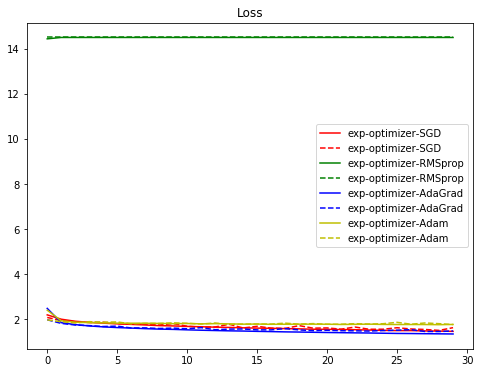

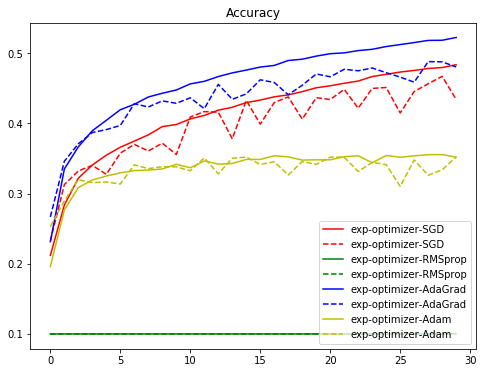

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()